# Célula 1: Importando bibliotecas e carregando os dados

Nesta célula, você vai importar as bibliotecas necessárias para manipulação de dados, construção de modelos de Machine Learning e avaliação dos resultados. Usará o `pandas` para trabalhar com os dados, o `numpy` para funções matemáticas, o `matplotlib` para visualização e o `scikit-learn` para os modelos e métricas. Você também vai carregar o dataset e mostrar as primeiras linhas para garantir que ele foi lido corretamente.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# Carregando o dataset
dataset = pd.read_csv('Dataset.csv')

# Exibindo as primeiras linhas do dataset
dataset.head()


,Idade,Renda Anual (em $),Gênero,Tempo no Site (min),Anúncio Clicado,Compra (0 ou 1)
0,29.0,30000.0,Feminino,5.741706,Não,0
1,58.0,50000.0,Feminino,21.885505,Sim,0
2,50.0,70000.0,Feminino,6.121339,Não,1
3,21.0,100000.0,Feminino,16.264925,Não,0
4,59.0,50000.0,Feminino,28.235667,Sim,1


# Célula 2: Pré-processamento dos dados

Nessa célula, o pré-processamento dos dados foi realizado. Os valores ausentes nas colunas numéricas foram preenchidos com a média dos valores. A coluna categórica 'Gênero' teve os valores ausentes substituídos pela moda (valor mais frequente). Na coluna 'Tempo no Site', valores negativos foram substituídos por `NaN` e, posteriormente, preenchidos pela média, a fim de evitar distorções nos resultados.


In [2]:
# Verificando os dados e substituindo valores ausentes
dataset['Idade'] = dataset['Idade'].fillna(dataset['Idade'].mean())
dataset['Renda Anual (em $)'] = dataset['Renda Anual (em $)'].fillna(dataset['Renda Anual (em $)'].mean())
dataset['Gênero'] = dataset['Gênero'].fillna(dataset['Gênero'].mode()[0])
dataset['Anúncio Clicado'] = dataset['Anúncio Clicado'].fillna(dataset['Anúncio Clicado'].mode()[0])

# Para "Tempo no Site (min)", se -1 for um valor que indica erro, substituímos por NaN e depois pelo valor médio
dataset['Tempo no Site (min)'] = dataset['Tempo no Site (min)'].replace(-1, np.nan)
dataset['Tempo no Site (min)'] = dataset['Tempo no Site (min)'].fillna(dataset['Tempo no Site (min)'].mean())

# Exibindo as primeiras linhas após o tratamento de valores ausentes
dataset.head()


,Idade,Renda Anual (em $),Gênero,Tempo no Site (min),Anúncio Clicado,Compra (0 ou 1)
0,29.0,30000.0,Feminino,5.741706,Não,0
1,58.0,50000.0,Feminino,21.885505,Sim,0
2,50.0,70000.0,Feminino,6.121339,Não,1
3,21.0,100000.0,Feminino,16.264925,Não,0
4,59.0,50000.0,Feminino,28.235667,Sim,1


# Célula 3: Conversão de variáveis categóricas

Nesta célula, as variáveis categóricas foram convertidas para valores numéricos. A coluna 'Gênero' foi transformada usando o `LabelEncoder`, enquanto a coluna 'Anúncio Clicado' foi binarizada, com 'Sim' transformado em 1 e 'Não' em 0. Esse procedimento é necessário para que os modelos de Machine Learning consigam processar essas variáveis.


In [3]:
# Convertendo variáveis categóricas para valores numéricos
le = LabelEncoder()
dataset['Gênero'] = le.fit_transform(dataset['Gênero'])
dataset['Anúncio Clicado'] = dataset['Anúncio Clicado'].apply(lambda x: 1 if x == 'Sim' else 0)

# Exibindo as primeiras linhas após a conversão
dataset.head()


,Idade,Renda Anual (em $),Gênero,Tempo no Site (min),Anúncio Clicado,Compra (0 ou 1)
0,29.0,30000.0,0,5.741706,0,0
1,58.0,50000.0,0,21.885505,1,0
2,50.0,70000.0,0,6.121339,0,1
3,21.0,100000.0,0,16.264925,0,0
4,59.0,50000.0,0,28.235667,1,1


# Célula 4: Preparação dos dados para o modelo

Aqui, as variáveis independentes (X) foram separadas da variável alvo (y). Além disso, os dados foram normalizados usando o `StandardScaler`, o que foi feito para garantir que todas as variáveis estivessem na mesma escala. Isso ajuda a melhorar a performance de certos modelos, como a Regressão Logística.


In [4]:
# Separando as variáveis independentes (X) e a variável alvo (y)
X = dataset.drop(columns=['Compra (0 ou 1)'])
y = dataset['Compra (0 ou 1)']

# Normalizando os dados para melhorar a performance da Regressão Logística
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Célula 5: Balanceamento de classes com SMOTE

Nesta célula, foi aplicado o SMOTE (Synthetic Minority Over-sampling Technique) para balancear as classes do dataset. O SMOTE gerou exemplos sintéticos da classe minoritária, equilibrando assim as classes e evitando que o modelo seja enviesado para a classe majoritária.


In [5]:
# Balanceando as classes com SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)




# Célula 6: Divisão dos dados em treino e teste

Nessa célula, o dataset foi dividido em duas partes: 80% para treino e 20% para teste. Isso permite que o modelo seja treinado com uma parte dos dados e avaliado com outra parte, que não foi utilizada durante o treinamento.


In [6]:
# Dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


# Célula 7: Definição dos modelos e ajuste de hiperparâmetros

Nessa célula, os modelos que serão utilizados foram definidos: Random Forest, Gradient Boosting, Árvore de Decisão e Regressão Logística. Para cada modelo, o `GridSearchCV` foi utilizado para buscar os melhores hiperparâmetros, usando validação cruzada. Esse procedimento ajuda a otimizar a performance dos modelos.


In [7]:
# Inicializando os modelos
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Árvore de Decisão": DecisionTreeClassifier(random_state=42),
    "Regressão Logística": LogisticRegression(max_iter=500, random_state=42)
}

# Definindo a validação cruzada
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Ajuste de Hiperparâmetros com GridSearchCV para Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=cv, scoring='accuracy', n_jobs=-1, verbose=2)
grid_rf.fit(X_train, y_train)

print("Melhores parâmetros para Random Forest:")
print(grid_rf.best_params_)

# Ajuste de Hiperparâmetros com GridSearchCV para Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=cv, scoring='accuracy', n_jobs=-1, verbose=2)
grid_gb.fit(X_train, y_train)

print("Melhores parâmetros para Gradient Boosting:")
print(grid_gb.best_params_)

# Ajuste de Hiperparâmetros com GridSearchCV para Árvore de Decisão
param_grid_dt = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=cv, scoring='accuracy', n_jobs=-1, verbose=2)
grid_dt.fit(X_train, y_train)

print("Melhores parâmetros para Árvore de Decisão:")
print(grid_dt.best_params_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Melhores parâmetros para Random Forest:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Melhores parâmetros para Gradient Boosting:
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Melhores parâmetros para Árvore de Decisão:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}


# Célula 8: Avaliação dos modelos e exibição de resultados

Aqui, os modelos foram treinados e avaliados com base nas previsões feitas para os dados de teste. A matriz de confusão e o relatório de classificação foram gerados para cada modelo. Também foi realizada uma validação cruzada para avaliar o desempenho dos modelos e as métricas de desempenho, como acurácia, precisão, recall e F1-score, foram calculadas.


In [8]:
# Função para exibir importância ou coeficientes das variáveis
def mostrar_importancia_variaveis(modelo, X, nome_modelo):
    try:
        importancias = modelo.feature_importances_  # Para modelos baseados em árvores
        importancia_df = pd.DataFrame({
            "Variável": X.columns,
            "Importância": importancias
        }).sort_values(by="Importância", ascending=False)
        
        print(f"Importância das Variáveis ({nome_modelo}):")
        print(importancia_df)
        print("\n")
    except AttributeError:
        try:
            coeficientes = modelo.coef_[0]  # Para Regressão Logística
            coef_df = pd.DataFrame({
                "Variável": X.columns,
                "Coeficiente": coeficientes
            }).sort_values(by="Coeficiente", ascending=False)
            
            print(f"Coeficientes das Variáveis ({nome_modelo}):")
            print(coef_df)
            print("\n")
        except Exception as e:
            print(f"O modelo {nome_modelo} não suporta cálculo de importância de variáveis diretamente.")
            print(e)
            print("\n")

# Armazenando as métricas dos modelos para comparação
results = {}

# Avaliação de todos os modelos
for name, classifier in classifiers.items():
    print(f"Avaliação do modelo {name} com ajuste de hiperparâmetros:")
    
    # Se o modelo tem GridSearchCV aplicado, use o melhor modelo
    if name == "Random Forest":
        classifier = grid_rf.best_estimator_
    elif name == "Gradient Boosting":
        classifier = grid_gb.best_estimator_
    elif name == "Árvore de Decisão":
        classifier = grid_dt.best_estimator_
    
    # Treinando o modelo
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    # Exibindo as métricas de desempenho
    print("Matriz de Confusão:")
    print(confusion_matrix(y_test, y_pred))
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))
    print(f"Acurácia do {name}: {accuracy_score(y_test, y_pred):.4f}")
    print("\n")
    
    # Validação cruzada
    cv_scores = cross_val_score(classifier, X_scaled, y, cv=cv, scoring='accuracy')
    print(f"Validação cruzada (Acurácia média) para {name}: {np.mean(cv_scores):.4f}")
    print("\n")
    
    # Exibindo importância das variáveis
    print(f"Analisando a importância das variáveis para o modelo {name}:")
    mostrar_importancia_variaveis(classifier, pd.DataFrame(X_res, columns=X.columns), name)

    # Armazenando as métricas de Acurácia, Precisão, Recall e F1-Score
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[name] = {
        "Acurácia": acc,
        "Precisão": precision,
        "Recall": recall,
        "F1-Score": f1
    }

# Convertendo os resultados para DataFrame para visualização
resultados_df = pd.DataFrame(results).T

# Exibindo a tabela comparativa
print("Comparação de Modelos:")
print(resultados_df)


Avaliação do modelo Random Forest com ajuste de hiperparâmetros:
Matriz de Confusão:
[[20 11]
 [ 3 20]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.87      0.65      0.74        31
           1       0.65      0.87      0.74        23

    accuracy                           0.74        54
   macro avg       0.76      0.76      0.74        54
weighted avg       0.77      0.74      0.74        54

Acurácia do Random Forest: 0.7407


Validação cruzada (Acurácia média) para Random Forest: 0.6800


Analisando a importância das variáveis para o modelo Random Forest:
Importância das Variáveis (Random Forest):
              Variável  Importância
3  Tempo no Site (min)     0.376671
0                Idade     0.329733
1   Renda Anual (em $)     0.165589
2               Gênero     0.067155
4      Anúncio Clicado     0.060851


Avaliação do modelo Gradient Boosting com ajuste de hiperparâmetros:
Matriz de Confusão:
[[19 12]
 [ 5 18]]

Re

# Célula 9: Plotagem dos resultados

Por fim, um gráfico de barras foi gerado para comparar as métricas de Acurácia, Precisão, Recall e F1-Score dos modelos. Esse gráfico facilita a visualização do desempenho dos modelos em relação às métricas.


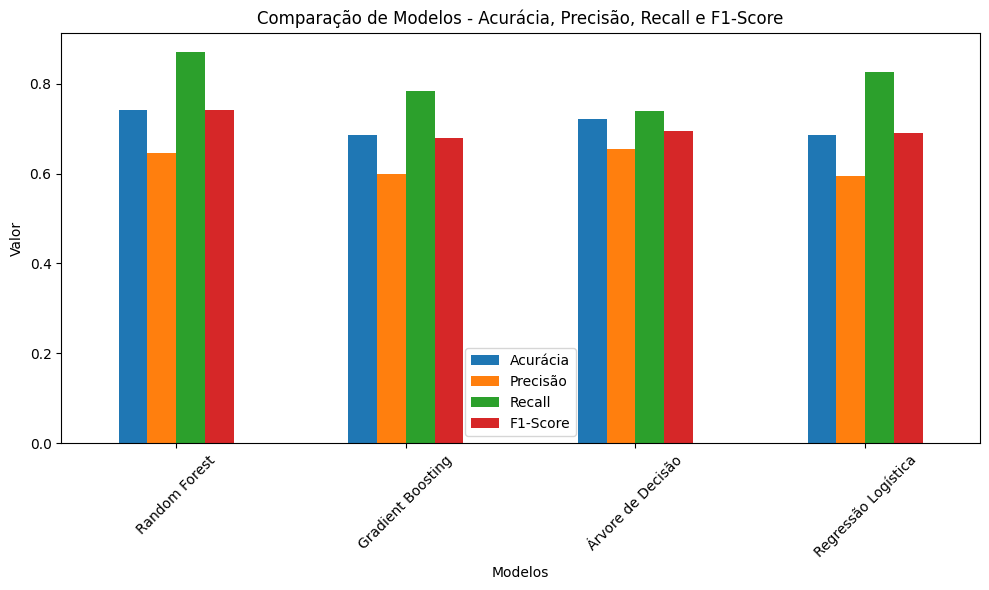

In [9]:
# Plotando gráfico de barras para comparar as métricas
resultados_df.plot(kind='bar', figsize=(10,6))
plt.title("Comparação de Modelos - Acurácia, Precisão, Recall e F1-Score")
plt.ylabel("Valor")
plt.xlabel("Modelos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
